# Expected Values

> **Expected values allow us to compare uncertain outcomes**. The expected value of a random outcome is the long-run average payoff you’d get if you could repeat the same uncertain situation many times under the same probabilities.

$EV = Σ(Probability × Outcome)$

Mathematically **discrete**: $\mathrm{EV}(X)=\sum_i p_i \, x_i$, **continuous**: $\mathrm{EV}(X)=\int x\,f(x)\,dx$

> So the $\text{Expected Value} = \text{weighted average of ALL possible outcomes}$

Note: The SUM across all possible outcomes is already the weighted average, so no need to divide by number of outcomes as you would do for a normal average.

**Simple Average**
**Average** of [10, 20, 30] = (10 + 20 + 30) / 3 = 20

**Weighted Average (when outcomes have different probabilities)**
* Outcome A: value 10, probability 50%
* Outcome B: value 20, probability 30%
* Outcome C: value 30, probability 20%

**Weighted Average** = (0.5 × 10) + (0.3 × 20) + (0.2 × 30) = 17
The probabilities already "do the dividing" — they sum to 100%, so multiplying and summing gives you the average.

## Example: Should We Build a Premium Feature?
* Business Context: SaaS company with 10,000 users. Considering building "Advanced Analytics" feature.
* Cost: $50,000 development
* Outcomes depend on: user adoption & churn impact

### Mathematical Concept

**Option A: Build Feature**
* Best case (30%): 500 users upgrade to premium (+$20/mo), reduce churn by 2%
* Base case (50%): 300 users upgrade, reduce churn by 1%
* Worst case (20%): 100 users upgrade, no churn impact

**Option B: Don't Build**
* Status quo: $0 cost, $0 benefit
* Calculate 12-month EV for each scenario.

### Implementation Steps
1. **Data Preparation**: Define scenarios with probabilities and financial impacts

2. **Calculate Expected Values**: Compute weighted average of all outcomes

3. **Compare & Decide**: Choose option with highest EV

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. BUSINESS DATA ===
current_users = 10000
avg_revenue_per_user = 10  # $/month
dev_cost = 50000
premium_price = 20  # $/month additional
timeframe = 12  # months

# === 2. DEFINE SCENARIOS ===
scenarios = {
    'Best Case': {
        'probability': 0.30,
        'premium_adopters': 500,
        'churn_reduction': 0.02  # 2% absolute reduction
    },
    'Base Case': {
        'probability': 0.50,
        'premium_adopters': 300,
        'churn_reduction': 0.01
    },
    'Worst Case': {
        'probability': 0.20,
        'premium_adopters': 100,
        'churn_reduction': 0.00
    }
}

# === 3. CALCULATE OUTCOMES FOR EACH SCENARIO ===
results = []

for scenario_name, params in scenarios.items():
    prob = params['probability']
    adopters = params['premium_adopters']
    churn_reduction = params['churn_reduction']
    
    # Revenue from premium upgrades
    premium_revenue = adopters * premium_price * timeframe
    
    # Revenue from reduced churn (users retained * avg revenue)
    retained_users = current_users * churn_reduction
    churn_revenue = retained_users * avg_revenue_per_user * timeframe
    
    # Total benefit
    total_benefit = premium_revenue + churn_revenue
    
    # Net outcome (benefit - cost)
    net_outcome = total_benefit - dev_cost
    
    # Weighted outcome (for EV calculation)
    weighted_outcome = prob * net_outcome
    
    results.append({
        'Scenario': scenario_name,
        'Probability': prob,
        'Premium Revenue': premium_revenue,
        'Churn Revenue': churn_revenue,
        'Total Benefit': total_benefit,
        'Net Outcome': net_outcome,
        'Weighted Outcome': weighted_outcome
    })

# === 4. CREATE DATAFRAME ===
df = pd.DataFrame(results)
print("Calculated Scenario Outcomes:")
df

Calculated Scenario Outcomes:


,Scenario,Probability,Premium Revenue,Churn Revenue,Total Benefit,Net Outcome,Weighted Outcome
0,Best Case,0.3,120000,24000.0,144000.0,94000.0,28200.0
1,Base Case,0.5,72000,12000.0,84000.0,34000.0,17000.0
2,Worst Case,0.2,24000,0.0,24000.0,-26000.0,-5200.0


In [9]:
# === 5. CALCULATE EXPECTED VALUE ===
ev_build_feature = df['Weighted Outcome'].sum()
ev_do_nothing = 0  # Status quo

print("=" * 60)
print("EXPECTED VALUE ANALYSIS: PREMIUM FEATURE")
print("=" * 60)
print(f"\nDevelopment Cost: ${dev_cost:,}")
print(f"Analysis Period: {timeframe} months\n")

print(df.to_string(index=False))

print("\n" + "=" * 60)
print(f"Expected Value (Build Feature): ${ev_build_feature:,.2f}")
print(f"Expected Value (Do Nothing):    ${ev_do_nothing:,.2f}")
print("=" * 60)

EXPECTED VALUE ANALYSIS: PREMIUM FEATURE

Development Cost: $50,000
Analysis Period: 12 months

  Scenario  Probability  Premium Revenue  Churn Revenue  Total Benefit  Net Outcome  Weighted Outcome
 Best Case          0.3           120000        24000.0       144000.0      94000.0           28200.0
 Base Case          0.5            72000        12000.0        84000.0      34000.0           17000.0
Worst Case          0.2            24000            0.0        24000.0     -26000.0           -5200.0

Expected Value (Build Feature): $40,000.00
Expected Value (Do Nothing):    $0.00



✓ RECOMMENDATION: BUILD THE FEATURE
  Expected advantage: $40,000.00 over 12 months


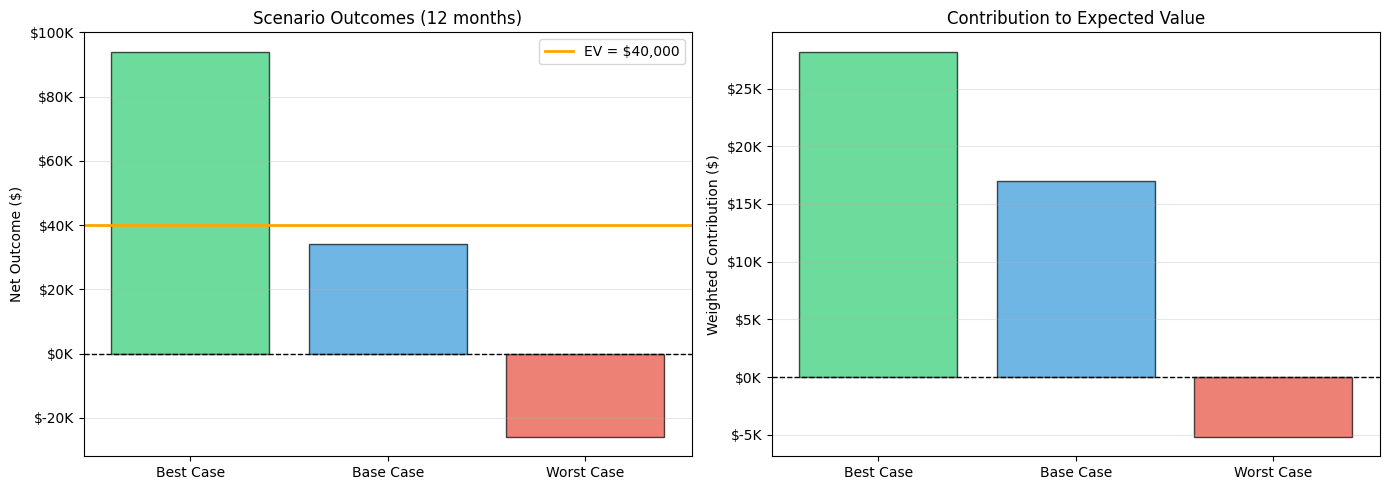


SENSITIVITY: What if Base Case probability changes?
Base Case Prob = 30.0% → EV = $25,600.00
Base Case Prob = 40.0% → EV = $26,800.00
Base Case Prob = 50.0% → EV = $28,000.00
Base Case Prob = 60.0% → EV = $29,200.00
Base Case Prob = 70.0% → EV = $30,400.00


In [10]:
# === 6. DECISION ===
if ev_build_feature > ev_do_nothing:
    decision = "BUILD THE FEATURE"
    advantage = ev_build_feature - ev_do_nothing
    print(f"\n✓ RECOMMENDATION: {decision}")
    print(f"  Expected advantage: ${advantage:,.2f} over 12 months")
else:
    decision = "DON'T BUILD"
    print(f"\n✗ RECOMMENDATION: {decision}")

# === 7. VISUALIZATION ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Scenario outcomes
scenarios_list = df['Scenario']
net_outcomes = df['Net Outcome']
colors = ['#2ecc71', '#3498db', '#e74c3c']

ax1.bar(scenarios_list, net_outcomes, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=ev_build_feature, color='orange', linestyle='-', linewidth=2, label=f'EV = ${ev_build_feature:,.0f}')
ax1.set_ylabel('Net Outcome ($)')
ax1.set_title('Scenario Outcomes (12 months)')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Format y-axis
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Chart 2: Weighted contribution to EV
weighted = df['Weighted Outcome']
ax2.bar(scenarios_list, weighted, color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_ylabel('Weighted Contribution ($)')
ax2.set_title('Contribution to Expected Value')
ax2.grid(axis='y', alpha=0.3)

# Format y-axis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# === 8. SENSITIVITY ANALYSIS ===
print("\n" + "=" * 60)
print("SENSITIVITY: What if Base Case probability changes?")
print("=" * 60)

base_probs = np.linspace(0.3, 0.7, 5)
for p_base in base_probs:
    # Redistribute probabilities
    p_best = (1 - p_base) * 0.4
    p_worst = (1 - p_base) * 0.6
    
    ev_adjusted = (
        p_best * (df.loc[0, 'Net Outcome']) +
        p_base * (df.loc[1, 'Net Outcome']) +
        p_worst * (df.loc[2, 'Net Outcome'])
    )
    
    print(f"Base Case Prob = {p_base:.1%} → EV = ${ev_adjusted:,.2f}")

## Coin Flipping example
How will flipping a coin turn out over time? Suppose you gain 10$ on heads and -10$ on tails. The expected value caluclation for this:

$E_{(price)} = p_{(tails)}\times{(-10)} + p_{(heads)}\times{10}$

If our coin is fair - so that each side has 50% probability of showing - the expected value is $0.5\times-10+0.5\times10=0$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1005)

# Number of trials
N=10000

total_earnings = pd.DataFrame(index= np.arange(N), columns= ['earnings'])

for i in range(N):
    draw = np.random.rand() # random number each draw

    if draw >= 0.5:
        curr_earn = 10 # win
    else:
        curr_earn = -10 # loose
    total_earnings.loc[i, 'earnings'] = curr_earn # store value

total_earnings['cumulative_earnings'] = total_earnings.earnings.cumsum() # cummulative sum
total_earnings['trials'] = np.arange(1, N+1) # simple counter
total_earnings['avg_earnings'] = total_earnings.cumulative_earnings / total_earnings.trials # average

In [40]:
total_earnings.head(30)

,earnings,cumulative_earnings,trials,avg_earnings
0,10,10,1,10.0
1,-10,0,2,0.0
2,-10,-10,3,-3.333333
3,10,0,4,0.0
4,-10,-10,5,-2.0
5,-10,-20,6,-3.333333
6,-10,-30,7,-4.285714
7,-10,-40,8,-5.0
8,10,-30,9,-3.333333
9,-10,-40,10,-4.0


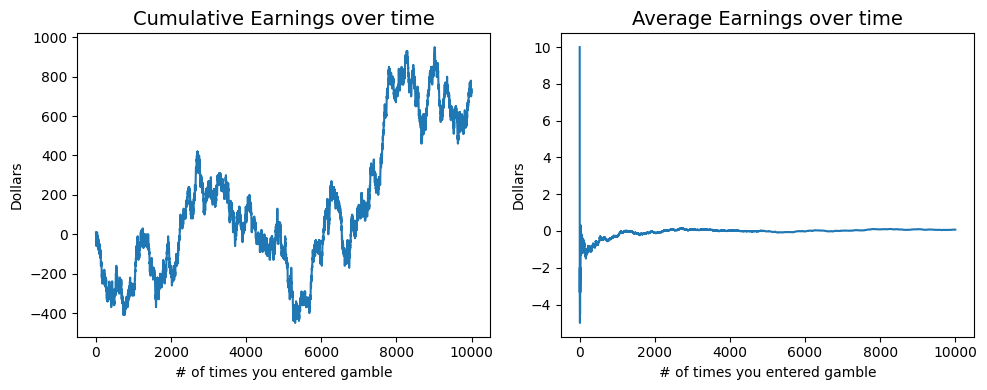

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
total_earnings.cumulative_earnings.plot(ax=ax[0])
total_earnings.avg_earnings.plot(ax=ax[1])

ax[0].set_title('Cumulative Earnings over time', fontsize=14)
ax[0].set_ylabel('Dollars', fontsize=10)
ax[0].set_xlabel('# of times you entered gamble', fontsize=10)

ax[1].set_title('Average Earnings over time', fontsize=14)
ax[1].set_ylabel('Dollars', fontsize=10)
ax[1].set_xlabel('# of times you entered gamble', fontsize=10)

plt.tight_layout()


EXPECTED VALUE ANALYSIS: PREMIUM FEATURE

Development Cost: $50,000
Analysis Period: 12 months

  Scenario  Probability  Premium Revenue  Churn Revenue  Total Benefit  Net Outcome  Weighted Outcome
 Best Case          0.3           120000        24000.0       144000.0      94000.0           28200.0
 Base Case          0.5            72000        12000.0        84000.0      34000.0           17000.0
Worst Case          0.2            24000            0.0        24000.0     -26000.0           -5200.0

Expected Value (Build Feature): $40,000.00
Expected Value (Do Nothing):    $0.00

✓ RECOMMENDATION: BUILD THE FEATURE
  Expected advantage: $40,000.00 over 12 months


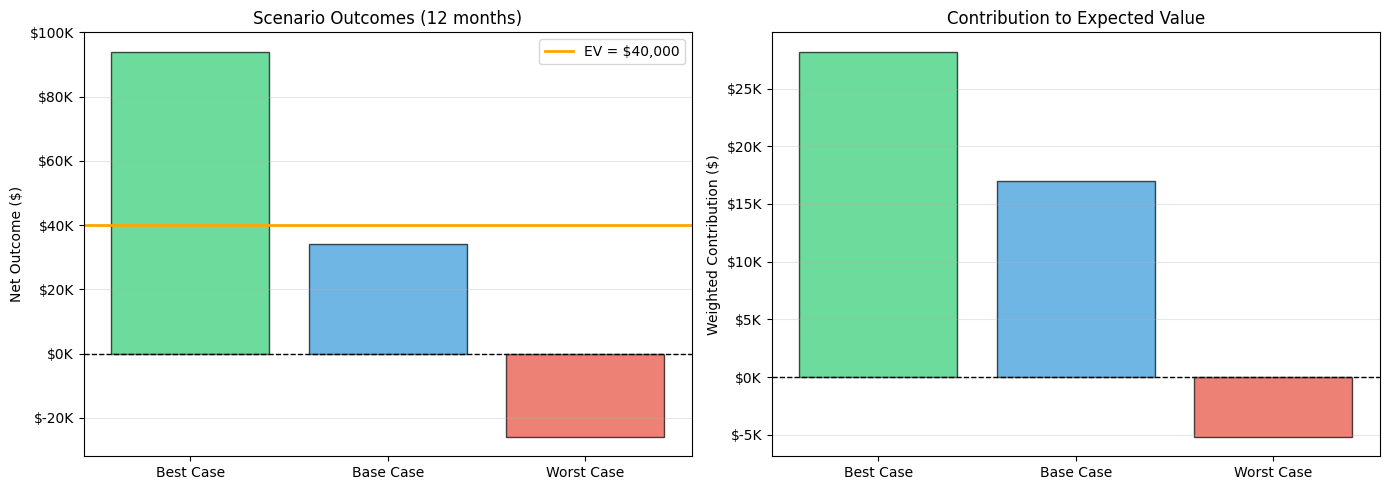


SENSITIVITY: What if Base Case probability changes?
Base Case Prob = 30.0% → EV = $25,600.00
Base Case Prob = 40.0% → EV = $26,800.00
Base Case Prob = 50.0% → EV = $28,000.00
Base Case Prob = 60.0% → EV = $29,200.00
Base Case Prob = 70.0% → EV = $30,400.00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. BUSINESS DATA ===
current_users = 10000
avg_revenue_per_user = 10  # $/month
dev_cost = 50000
premium_price = 20  # $/month additional
timeframe = 12  # months

# === 2. DEFINE SCENARIOS ===
scenarios = {
    'Best Case': {
        'probability': 0.30,
        'premium_adopters': 500,
        'churn_reduction': 0.02  # 2% absolute reduction
    },
    'Base Case': {
        'probability': 0.50,
        'premium_adopters': 300,
        'churn_reduction': 0.01
    },
    'Worst Case': {
        'probability': 0.20,
        'premium_adopters': 100,
        'churn_reduction': 0.00
    }
}

# === 3. CALCULATE OUTCOMES FOR EACH SCENARIO ===
results = []

for scenario_name, params in scenarios.items():
    prob = params['probability']
    adopters = params['premium_adopters']
    churn_reduction = params['churn_reduction']
    
    # Revenue from premium upgrades
    premium_revenue = adopters * premium_price * timeframe
    
    # Revenue from reduced churn (users retained * avg revenue)
    retained_users = current_users * churn_reduction
    churn_revenue = retained_users * avg_revenue_per_user * timeframe
    
    # Total benefit
    total_benefit = premium_revenue + churn_revenue
    
    # Net outcome (benefit - cost)
    net_outcome = total_benefit - dev_cost
    
    # Weighted outcome (for EV calculation)
    weighted_outcome = prob * net_outcome
    
    results.append({
        'Scenario': scenario_name,
        'Probability': prob,
        'Premium Revenue': premium_revenue,
        'Churn Revenue': churn_revenue,
        'Total Benefit': total_benefit,
        'Net Outcome': net_outcome,
        'Weighted Outcome': weighted_outcome
    })

# === 4. CREATE DATAFRAME ===
df = pd.DataFrame(results)

# === 5. CALCULATE EXPECTED VALUE ===
ev_build_feature = df['Weighted Outcome'].sum()
ev_do_nothing = 0  # Status quo

print("=" * 60)
print("EXPECTED VALUE ANALYSIS: PREMIUM FEATURE")
print("=" * 60)
print(f"\nDevelopment Cost: ${dev_cost:,}")
print(f"Analysis Period: {timeframe} months\n")

print(df.to_string(index=False))

print("\n" + "=" * 60)
print(f"Expected Value (Build Feature): ${ev_build_feature:,.2f}")
print(f"Expected Value (Do Nothing):    ${ev_do_nothing:,.2f}")
print("=" * 60)

# === 6. DECISION ===
if ev_build_feature > ev_do_nothing:
    decision = "BUILD THE FEATURE"
    advantage = ev_build_feature - ev_do_nothing
    print(f"\n✓ RECOMMENDATION: {decision}")
    print(f"  Expected advantage: ${advantage:,.2f} over 12 months")
else:
    decision = "DON'T BUILD"
    print(f"\n✗ RECOMMENDATION: {decision}")

# === 7. VISUALIZATION ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Scenario outcomes
scenarios_list = df['Scenario']
net_outcomes = df['Net Outcome']
colors = ['#2ecc71', '#3498db', '#e74c3c']

ax1.bar(scenarios_list, net_outcomes, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=ev_build_feature, color='orange', linestyle='-', linewidth=2, label=f'EV = ${ev_build_feature:,.0f}')
ax1.set_ylabel('Net Outcome ($)')
ax1.set_title('Scenario Outcomes (12 months)')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Format y-axis
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Chart 2: Weighted contribution to EV
weighted = df['Weighted Outcome']
ax2.bar(scenarios_list, weighted, color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_ylabel('Weighted Contribution ($)')
ax2.set_title('Contribution to Expected Value')
ax2.grid(axis='y', alpha=0.3)

# Format y-axis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# === 8. SENSITIVITY ANALYSIS ===
print("\n" + "=" * 60)
print("SENSITIVITY: What if Base Case probability changes?")
print("=" * 60)

base_probs = np.linspace(0.3, 0.7, 5)
for p_base in base_probs:
    # Redistribute probabilities
    p_best = (1 - p_base) * 0.4
    p_worst = (1 - p_base) * 0.6
    
    ev_adjusted = (
        p_best * (df.loc[0, 'Net Outcome']) +
        p_base * (df.loc[1, 'Net Outcome']) +
        p_worst * (df.loc[2, 'Net Outcome'])
    )
    
    print(f"Base Case Prob = {p_base:.1%} → EV = ${ev_adjusted:,.2f}")